In [3]:
import numpy as np
import pandas as pd
import prince
from scipy import stats
import os
from ydata_profiling import ProfileReport

In [4]:
ahs = pd.read_csv('C:/Users/shrof/Downloads/ahs_cleaned-1.csv', na_values=[-6, "'-9'"])

In [5]:
profile = ProfileReport(ahs, 
                       title = 'American Housing Survey EDA',
                       html = {'style': {'full_width': True}},
                       minimal = False)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
ahs['HINCP']

0        257000.0
1        201000.0
2             NaN
3         66900.0
4         35000.0
           ...   
63180     74000.0
63181    207000.0
63182    158100.0
63183    130200.0
63184    120000.0
Name: HINCP, Length: 63185, dtype: float64

In [7]:
ahs['RODENT'].value_counts()

RODENT
No signs in the last 12 months            48821
Seen a few times in the last 12 months     4212
Seen monthly in the last 12 months          522
Seen daily in the last 12 months            474
Seen weekly in the last 12 months           426
Name: count, dtype: int64

In [8]:
ahs.groupby("RODENT").agg({'HINCP':'mean'})

HINCP
RODENT                                              
No signs in the last 12 months          87738.246779
Seen a few times in the last 12 months  86156.387464
Seen daily in the last 12 months        51274.924051
Seen monthly in the last 12 months      82798.544061
Seen weekly in the last 12 months       64086.826291

In [9]:
stats.f_oneway(ahs.query("RODENT=='No signs in the last 12 months'").HINCP.dropna(),
              ahs.query("RODENT=='Seen a few times in the last 12 months'").HINCP.dropna(),
              ahs.query("RODENT=='Seen daily in the last 12 months'").HINCP.dropna(),
              ahs.query("RODENT=='Seen monthly in the last 12 months'").HINCP.dropna(),
              ahs.query("RODENT=='Seen weekly in the last 12 months'").HINCP.dropna())

F_onewayResult(statistic=np.float64(21.68467615110672), pvalue=np.float64(6.703833330074091e-18))

In [10]:
ahs['YRBUILT'].value_counts()

YRBUILT
1970    9313
1980    9072
2000    8883
1990    7863
1960    6860
1950    6330
1919    3594
1940    3001
1920    2494
1930    1699
2010     846
2017     503
2016     489
2015     486
2014     444
2013     340
2012     320
2018     269
2011     251
2019     128
Name: count, dtype: int64

In [11]:
ahs['MARKETVAL'].describe()

count    3.839000e+04
mean     3.762769e+05
std      5.537866e+05
min      1.000000e+03
25%      1.404465e+05
50%      2.552730e+05
75%      4.359682e+05
max      9.999998e+06
Name: MARKETVAL, dtype: float64

In [12]:
ahs[['MARKETVAL', 'YRBUILT']].corr()

MARKETVAL  YRBUILT
MARKETVAL    1.00000 -0.00403
YRBUILT     -0.00403  1.00000

In [13]:
ahs2 = ahs[['MARKETVAL', 'YRBUILT']].dropna()
stats.pearsonr(ahs2['MARKETVAL'], ahs2['YRBUILT'])

PearsonRResult(statistic=np.float64(-0.004029500232993678), pvalue=np.float64(0.4298243664117505))

In [14]:
ahs.columns

Index(['Unnamed: 0', 'DIVISION', 'TENURE', 'YRBUILT', 'UNITSIZE', 'HSHLDTYPE',
       'HHRACE', 'HHSEX', 'HINCP', 'TOTHCAMT', 'MARKETVAL', 'MAINTAMT',
       'FUSEBLOW', 'SEWBREAK', 'ROACH', 'RODENT', 'NOWIRE', 'PLUGS', 'COLD',
       'NOTOIL', 'NOWAT', 'FLOORHOLE', 'FNDCRUMB', 'PAINTPEEL', 'ROOFHOLE',
       'ROOFSAG', 'ROOFSHIN', 'WALLCRACK', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD',
       'WINBROKE', 'LEAKI', 'MOLDBATH'],
      dtype='object')

In [15]:
broken = ahs[['FUSEBLOW', 'SEWBREAK', 'ROACH', 'RODENT', 'NOWIRE', 'PLUGS', 'COLD',
       'NOTOIL', 'NOWAT', 'FLOORHOLE', 'FNDCRUMB', 'PAINTPEEL', 'ROOFHOLE',
       'ROOFSAG', 'ROOFSHIN', 'WALLCRACK', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD',
       'WINBROKE', 'LEAKI', 'MOLDBATH']].dropna()

In [16]:
MCA = prince.MCA(n_components=2)
MCA = MCA.fit(broken)

In [17]:
pd.set_option('display.max_rows', 100)
MCA.column_coordinates(broken).sort_values(1)

0         1
WALLSLOPE_Broken                                    4.859655 -3.009766
ROOFSAG_Broken                                      3.902628 -2.234819
ROOFHOLE_Broken                                     4.146946 -1.963685
ROOFSHIN_Broken                                     2.383511 -1.444533
WALLSIDE_Broken                                     3.081910 -1.352715
WINBOARD_Broken                                     3.453373 -1.086283
FLOORHOLE_Broken                                    4.284051 -0.547161
FNDCRUMB_Broken                                     1.821303 -0.520199
WINBROKE_Broken                                     2.177859 -0.394556
LEAKI_Not broken                                   -0.080362 -0.094173
FUSEBLOW_No fuses / breakers blown in the last ... -0.071363 -0.067784
COLD_Not broken                                    -0.083473 -0.062740
RODENT_No signs in the last 12 months              -0.115875 -0.060796
ROACH_Seen a few times in the last 12 months        0.343743 -0.058101
NOTOIL_Not broken                                  -0.024595 -0.054542
SEWBREAK_No breakdowns in the last 3 months        -0.024639 -0.048657
NOWAT_Not broken                                   -0.022932 -0.048199
ROACH_No signs in the last 12 months               -0.080401 -0.016636
MOLDBATH_Not broken                                -0.032766 -0.014098
NOWIRE_Not broken                                  -0.017618 -0.008580
PLUGS_Not broken                                   -0.018019 -0.008072
WALLCRACK_Not broken                               -0.109388 -0.006432
PAINTPEEL_Not broken                               -0.059399 -0.000310
FLOORHOLE_Not broken                               -0.042145  0.005383
WINBOARD_Not broken                                -0.031694  0.009970
WINBROKE_Not broken                                -0.076221  0.013809
PAINTPEEL_Broken                                    3.404738  0.017764
ROOFHOLE_Not broken                                -0.054294  0.025710
FNDCRUMB_Not broken                                -0.092294  0.026361
WALLSLOPE_Not broken                               -0.046273  0.028659
WALLSIDE_Not broken                                -0.072108  0.031650
ROOFSAG_Not broken                                 -0.060365  0.034568
ROOFSHIN_Not broken                                -0.076179  0.046169
WALLCRACK_Broken                                    2.236711  0.131528
RODENT_Seen monthly in the last 12 months           1.356909  0.316775
NOWIRE_Broken                                       0.685454  0.333805
RODENT_Seen a few times in the last 12 months       0.580362  0.335767
ROACH_Seen daily in the last 12 months              2.536492  0.412491
PLUGS_Broken                                        1.027693  0.460370
ROACH_Seen weekly in the last 12 months             1.212481  0.586147
ROACH_Seen monthly in the last 12 months            0.917795  0.589436
FUSEBLOW_1 fuse / breaker blown in the last 3 m...  0.660548  0.602517
FUSEBLOW_2 fuses / breakers blown in the last 3...  0.752364  0.672426
COLD_Broken                                         1.363433  1.024786
RODENT_Seen weekly in the last 12 months            1.927010  1.227578
LEAKI_Broken                                        1.118391  1.310587
MOLDBATH_Broken                                     3.340381  1.437270
FUSEBLOW_4 or more fuses / breakers blown in th...  1.584153  1.460131
FUSEBLOW_3 fuses / breakers blown in the last 3...  1.296619  1.554366
RODENT_Seen daily in the last 12 months             3.184798  1.636147
NOWAT_Broken                                        1.089739  2.290431
SEWBREAK_Sewage system broke down in the last 3...  0.679896  2.368076
SEWBREAK_Two breakdowns in the last 3 months fo...  3.191035  3.813036
SEWBREAK_Four or more breakdowns in last three ...  5.443686  3.992466
NOTOIL_Broken                                       2.186903  4.849715
SEWBREAK_One breakdown in the last 3 months for...  1.532816  5.191900
SEWBREAK_Thr

In [18]:
indices = MCA.row_coordinates(broken).reset_index()
indices = indices.rename({0:'brokenness', 
                          1:'structure_infrastructure'},
                        axis=1)

In [19]:
ahs_merge = pd.merge(ahs.reset_index(), indices,
                    how = 'outer',
                    on = 'index',
                    validate = 'one_to_one')

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import prince

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [21]:
# Brokeness by market value

In [23]:
ahs_merge[['brokenness', 'MARKETVAL']]

brokenness  MARKETVAL
0       -0.159316   280249.0
1       -0.159316  1000270.0
2             NaN    96118.0
3       -0.073490   198510.0
4             NaN        NaN
...           ...        ...
63180   -0.159316   925211.0
63181   -0.107031   372363.0
63182   -0.159316   257198.0
63183   -0.159316   510021.0
63184   -0.159316   440376.0

[63185 rows x 2 columns]

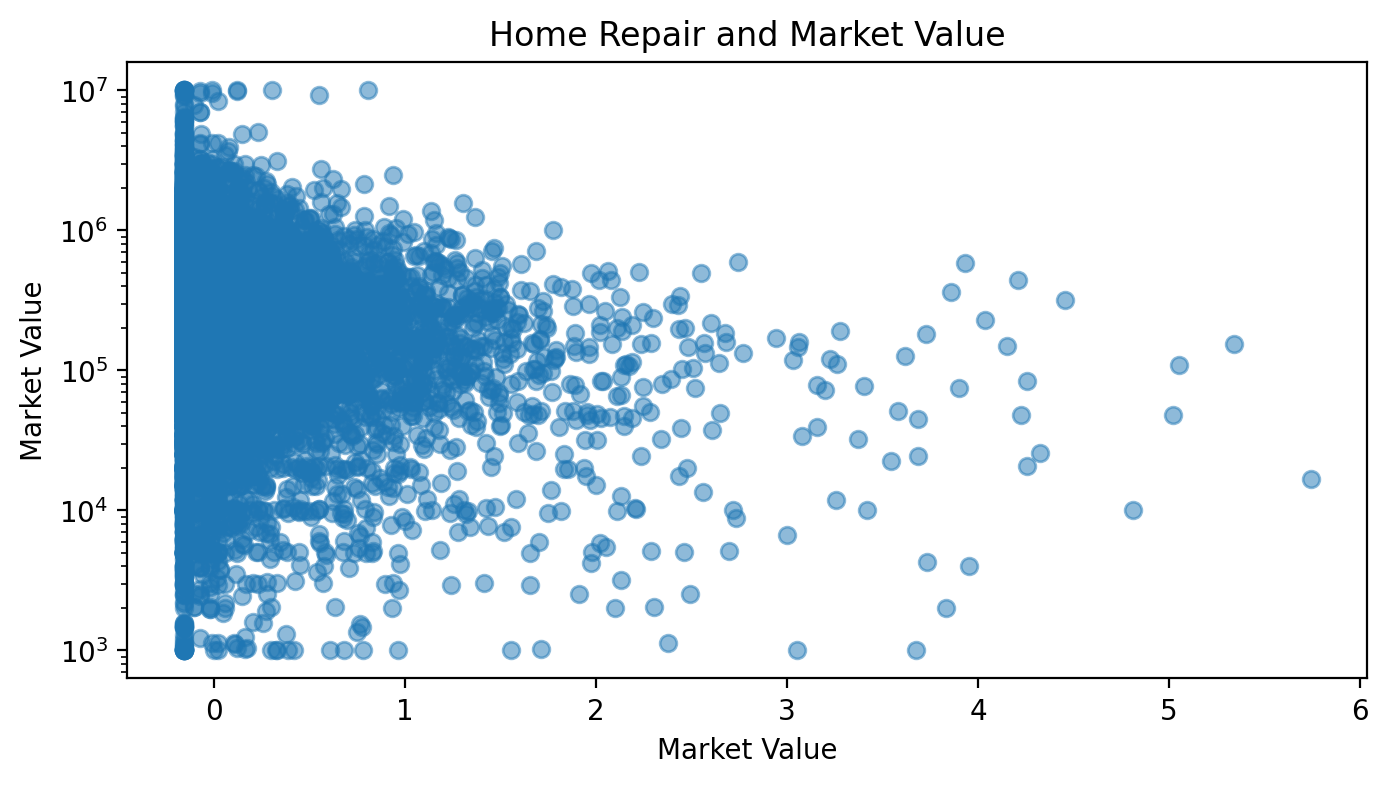

In [69]:
fig, ax = plt.subplots(figsize = (8,4))
ax.set(ylabel = 'Market Value')
ax.set(xlabel = 'Market Value')
ax.set(yscale='log')
ax.set_title('Home Repair and Market Value', fontsize=12)
#sns.scatterplot(ahs_merge, x='brokenness', y='MARKETVAL', alpha=0.2)
plt.scatter(ahs_merge['brokenness'], ahs_merge['MARKETVAL'], alpha=0.5)

In [ ]:
ahs_merge2 = ahs_merge.query('brokenness <-.15')

In [57]:
# ara of country with most squatters

In [58]:
ahs_merge[['DIVISION','TENURE']]

DIVISION                                             TENURE
0          South Atlantic  Owned or being bought by someone in your house...
1             New England  Owned or being bought by someone in your house...
2      West South Central                                                NaN
3      West South Central  Owned or being bought by someone in your house...
4      West North Central                                             Rented
...                   ...                                                ...
63180  East North Central  Owned or being bought by someone in your house...
63181      South Atlantic  Owned or being bought by someone in your house...
63182      South Atlantic  Owned or being bought by someone in your house...
63183      South Atlantic  Owned or being bought by someone in your house...
63184      South Atlantic  Owned or being bought by someone in your house...

[63185 rows x 2 columns]

In [61]:
round(100*pd.crosstab(ahs_merge['DIVISION'], ahs_merge['TENURE'], normalize='index'), 2)

TENURE              Occupied without payment of rent  \
DIVISION                                               
East North Central                              1.18   
East South Central                              2.59   
Middle Atlantic                                 1.14   
Mountain                                        1.30   
New England                                     1.15   
Pacific                                         1.05   
South Atlantic                                  1.63   
West North Central                              1.37   
West South Central                              1.50   

TENURE              Owned or being bought by someone in your household  Rented  
DIVISION                                                                        
East North Central                                              66.55    32.27  
East South Central                                              59.37    38.04  
Middle Atlantic                                                 56.16    42.70  
Mountain                                                        64.05    34.65  
New England                                                     59.68    39.17  
Pacific                                                         55.93    43.01  
South Atlantic                                                  61.70    36.67  
West North Central                                              65.30    33.33  
West South Central                                              60.10    38.40

In [62]:
ahs_esc = ahs_merge.query("DIVISION == 'East South Central'")

([<matplotlib.patches.Wedge at 0x1a79d65f620>,
 [Text(-0.31908656064682483, 1.0527030762824723, ''),
  Text(0.23250859243786626, -1.075146387448036, ''),
  Text(1.096363895632926, -0.08936558819027797, '')])

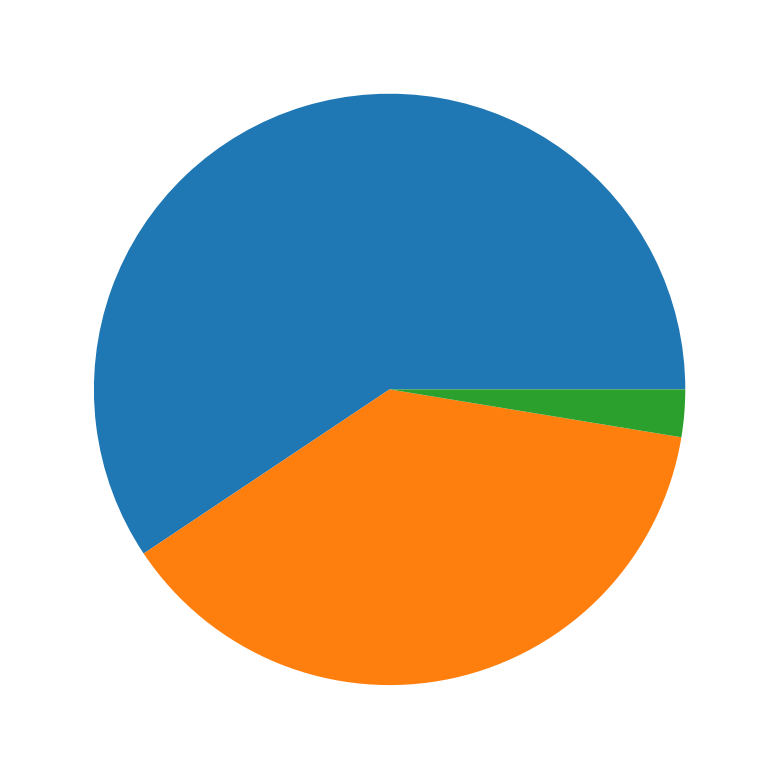

In [65]:
plt.pie(ahs_esc['TENURE'].value_counts())

KeyError: "None of [Index(['Count'], dtype='object')] are in the [columns]"

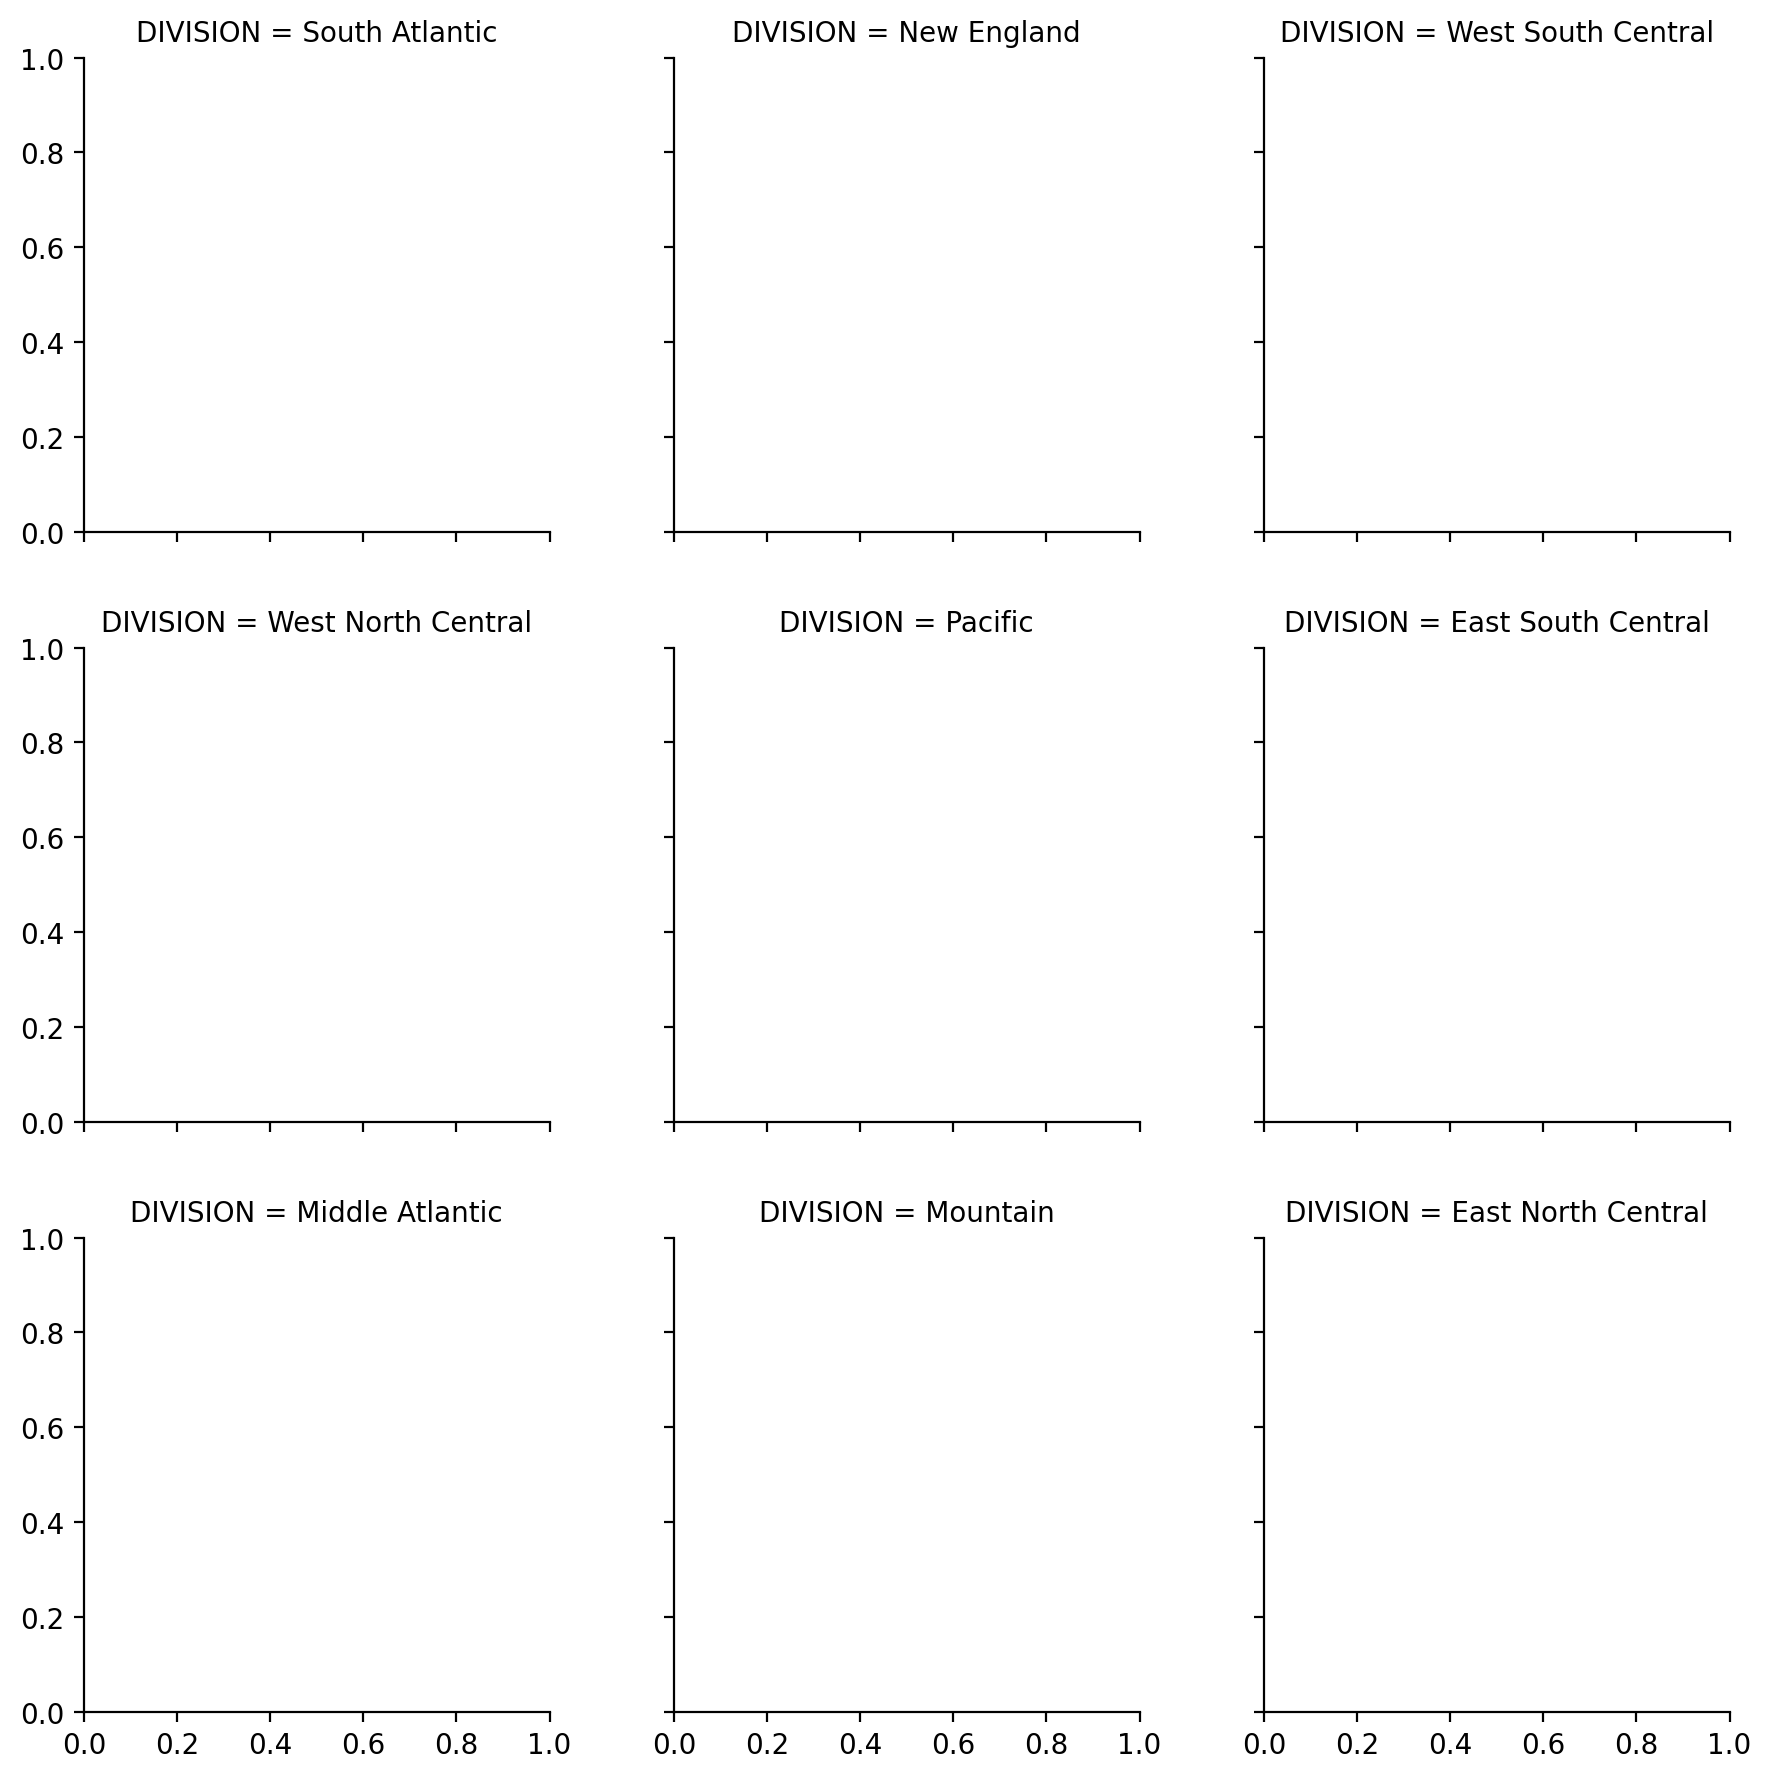

In [78]:
ahs_pie = ahs_merge.groupby(['DIVISION', 'TENURE']).size().reset_index()
ahs_pie = ahs_pie.rename({0:'Count'}, axis = 1)
#ahs_pie.plot.pie(subplots=True, figsize=(7,2), layout=(3,3))
g = sns.FacetGrid(ahs_merge, col='DIVISION', col_wrap=3)
g.map(plt.pie, 'Count')

In [80]:
ahs_merge[['DIVISION','TENURE']]
ahs_merge['squat'] = ahs_merge['TENURE'] == 'Occupied without payment of rent'

<Axes: xlabel='squat', ylabel='DIVISION'>

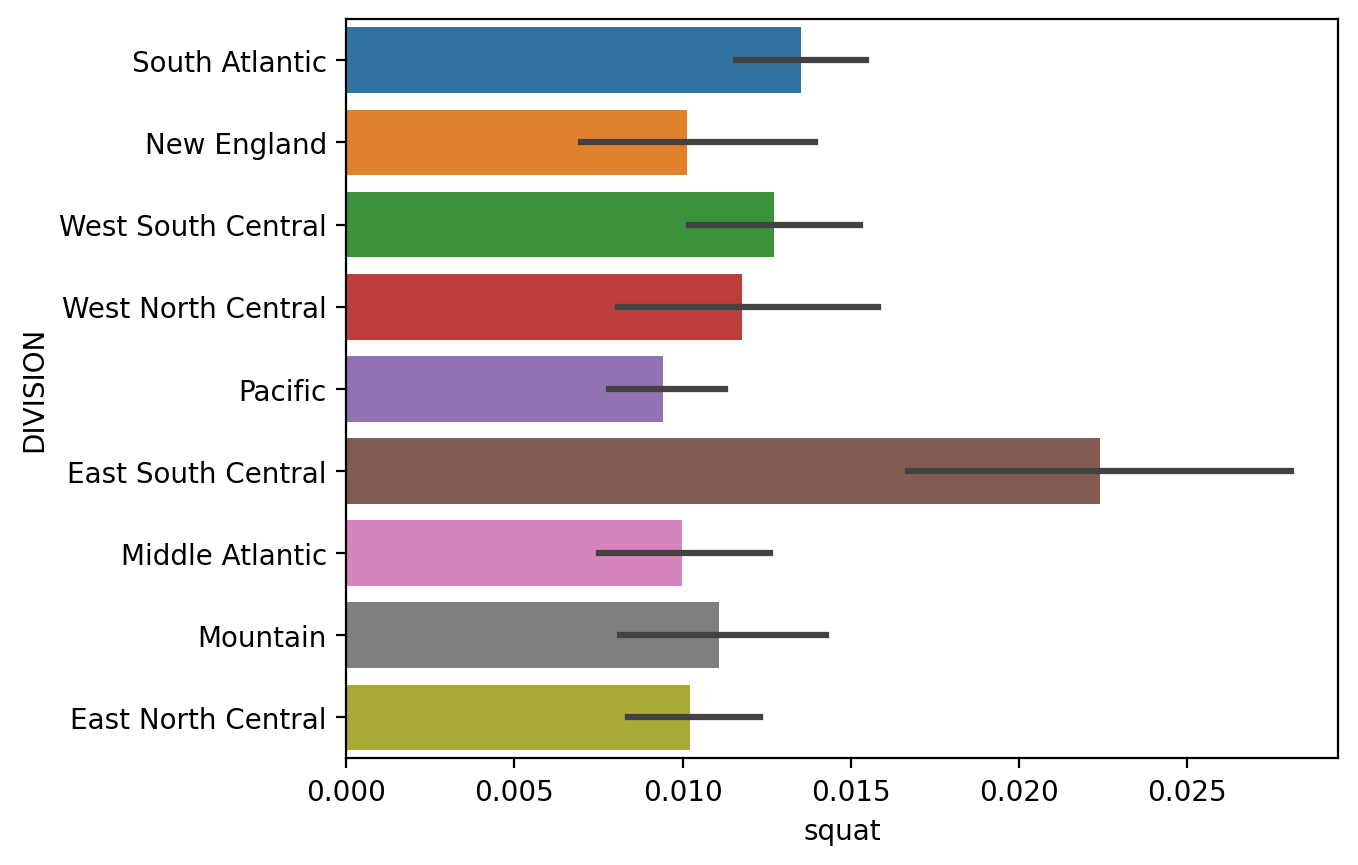

In [84]:
sns.barplot(ahs_merge, y='DIVISION', x='squat', hue='DIVISION')

In [85]:
# Increase in square footage over time

In [91]:
ahs_merge['UNITSIZE'].unique()
replace_map = {'2,000 to 2,499 square feet': 2000, 
               '3,000 to 3,999 square feet': 3000,
       '750 to 999 square feet': 750, 
       '1,500 to 1,999 square feet': 1500,
       '500 to 749 square feet': 500,
       '1,000 to 1,499 square feet': 1000,
       'Less than 500 square feet': 0,  
       '4,000 square feet or more': 4000,
       '2,500 to 2,999 square feet': 2500}
ahs_merge['size'] = ahs_merge['UNITSIZE'].replace(replace_map)

C:\Users\shrof\AppData\Local\Temp\ipykernel_10308\4183072310.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ahs_merge['size'] = ahs_merge['UNITSIZE'].replace(replace_map)


In [92]:
ahs_line = ahs_merge.groupby(['YRBUILT']).agg({'size':'mean'}).reset_index

In [94]:
ahs_line

<bound method DataFrame.reset_index of                 size
YRBUILT             
1919     1389.087504
1920     1229.286398
1930     1267.018380
1940     1193.785851
1950     1264.884622
1960     1268.119451
1970     1281.480398
1980     1363.223140
1990     1616.493384
2000     1757.886905
2010     1432.258065
2011     1941.908714
2012     1757.234727
2013     1804.953560
2014     1838.270142
2015     1675.965665
2016     1755.965293
2017     1701.839827
2018     1823.122530
2019     1878.318584>

In [93]:
sns.lineplot(ahs_line, x = 'YRBUILT', y='size')

TypeError: Data source must be a DataFrame or Mapping, not <class 'method'>.

In [95]:
# Comparison of women renters to other groups

In [100]:
ahs_broke = ahs_merge.groupby(['HHSEX','HHRACE','TENURE']).agg({'brokenness': 'mean'}).reset_index()
ahs_merge[['HHSEX','HHRACE','TENURE','brokenness']]
ahs_broke

HHSEX                               HHRACE  \
0   Female  American Indian, Alaska Native only   
1   Female  American Indian, Alaska Native only   
2   Female  American Indian, Alaska Native only   
3   Female                           Asian only   
4   Female                           Asian only   
5   Female                           Asian only   
6   Female                           Black only   
7   Female                           Black only   
8   Female                           Black only   
9   Female                                Other   
10  Female                                Other   
11  Female                                Other   
12  Female                        White / Black   
13  Female                        White / Black   
14  Female                        White / Black   
15  Female                           White only   
16  Female                           White only   
17  Female                           White only   
18    Male  American Indian, Alaska Native only   
19    Male  American Indian, Alaska Native only   
20    Male  American Indian, Alaska Native only   
21    Male                           Asian only   
22    Male                           Asian only   
23    Male                           Asian only   
24    Male                           Black only   
25    Male                           Black only   
26    Male                           Black only   
27    Male                                Other   
28    Male                                Other   
29    Male                                Other   
30    Male                        White / Black   
31    Male                        White / Black   
32    Male                        White / Black   
33    Male                           White only   
34    Male                           White only   
35    Male                           White only   

                                               TENURE  brokenness  
0                    Occupied without payment of rent    0.394492  
1   Owned or being bought by someone in your house...    0.081094  
2                                              Rented    0.192015  
3                    Occupied without payment of rent   -0.117841  
4   Owned or being bought by someone in your house...   -0.069551  
5                                              Rented   -0.047984  
6                    Occupied without payment of rent    0.257861  
7   Owned or being bought by someone in your house...    0.041211  
8                                              Rented    0.134380  
9                    Occupied without payment of rent    0.034375  
10  Owned or being bought by someone in your house...    0.022001  
11                                             Rented    0.040967  
12                   Occupied without payment of rent         NaN  
13  Owned or being bought by someone in your house...    0.030710  
14                                             Rented    0.016041  
15                   Occupied without payment of rent    0.143418  
16  Owned or being bought by someone in your house...   -0.014752  
17                                             Rented    0.093284  
18                   Occupied without payment of rent   -0.083514  
19  Owned or being bought by someone in your house...    0.104686  
20                                             Rented    0.196904  
21                   Occupied without payment of rent   -0.086701  
22  Owned or being bought by someone in your house...   -0.072030  
23                                             Rented   -0.039585  
24                   Occupied without payment of rent    0.192500  
25  Owned or being bought by someone in your house...    0.026872  
26                                             Rented    0.112351  
27                   Occupied without payment of rent    0.547958  
28  Owned or being bought by someone in your house...   -0.013121  
29                                             Rented    0.087934  
30       

<Axes: xlabel='brokenness', ylabel='TENURE'>

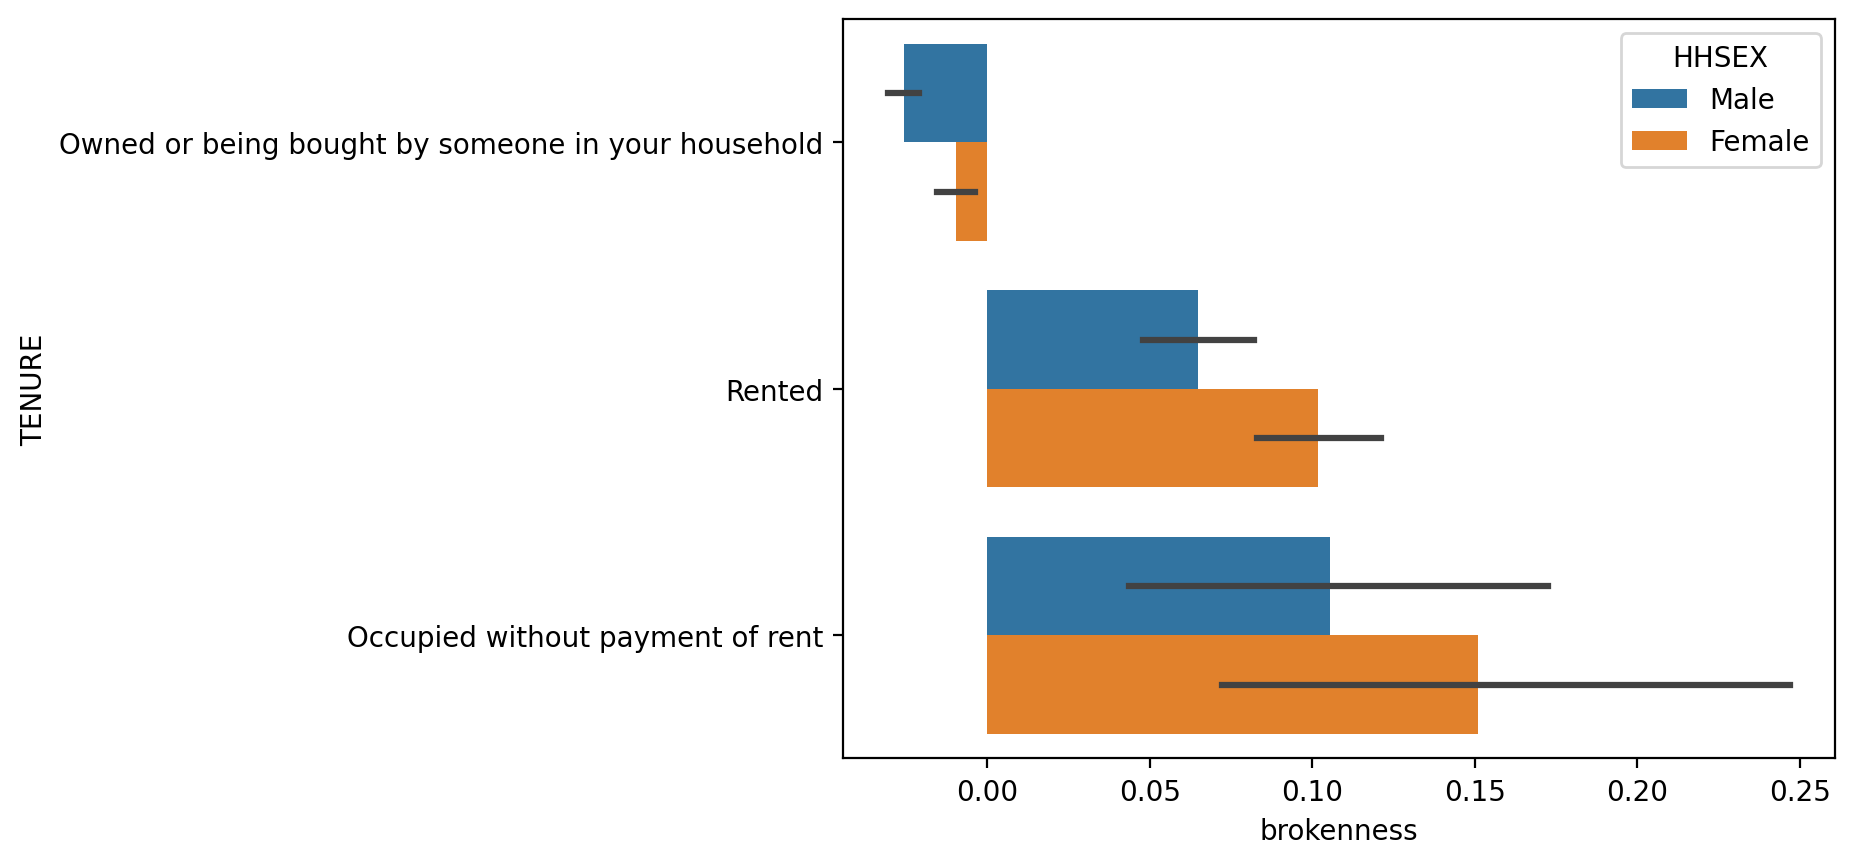

In [108]:
sns.barplot(ahs_merge, y='TENURE',x='brokenness', hue='HHSEX')

In [115]:
ahs_merge['HHRACE'].unique()

replace_map = {'White only':'White',
               'Black only':'Not White Only',
                'American Indian': 'Not White Only',
                'Alaska Native only':'Not White Only',
                  'Asian only': 'Not White Only',
                'Other': 'Not White Only',
                'White / Black': 'Not White Only'}

# g=sns.FacetGrid(ahs_merge, col='HHRACE', col_wrap=3)
# g.map(sns.barplot, 'brokenness', 'TENURE', 'HHSEX')

ahs_merge['white'] = ahs_merge['HHRACE'].replace(replace_map)

C:\Users\shrof\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\shrof\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\shrof\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\shrof\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users

AttributeError: 'FacetGrid' object has no attribute 'set_title'

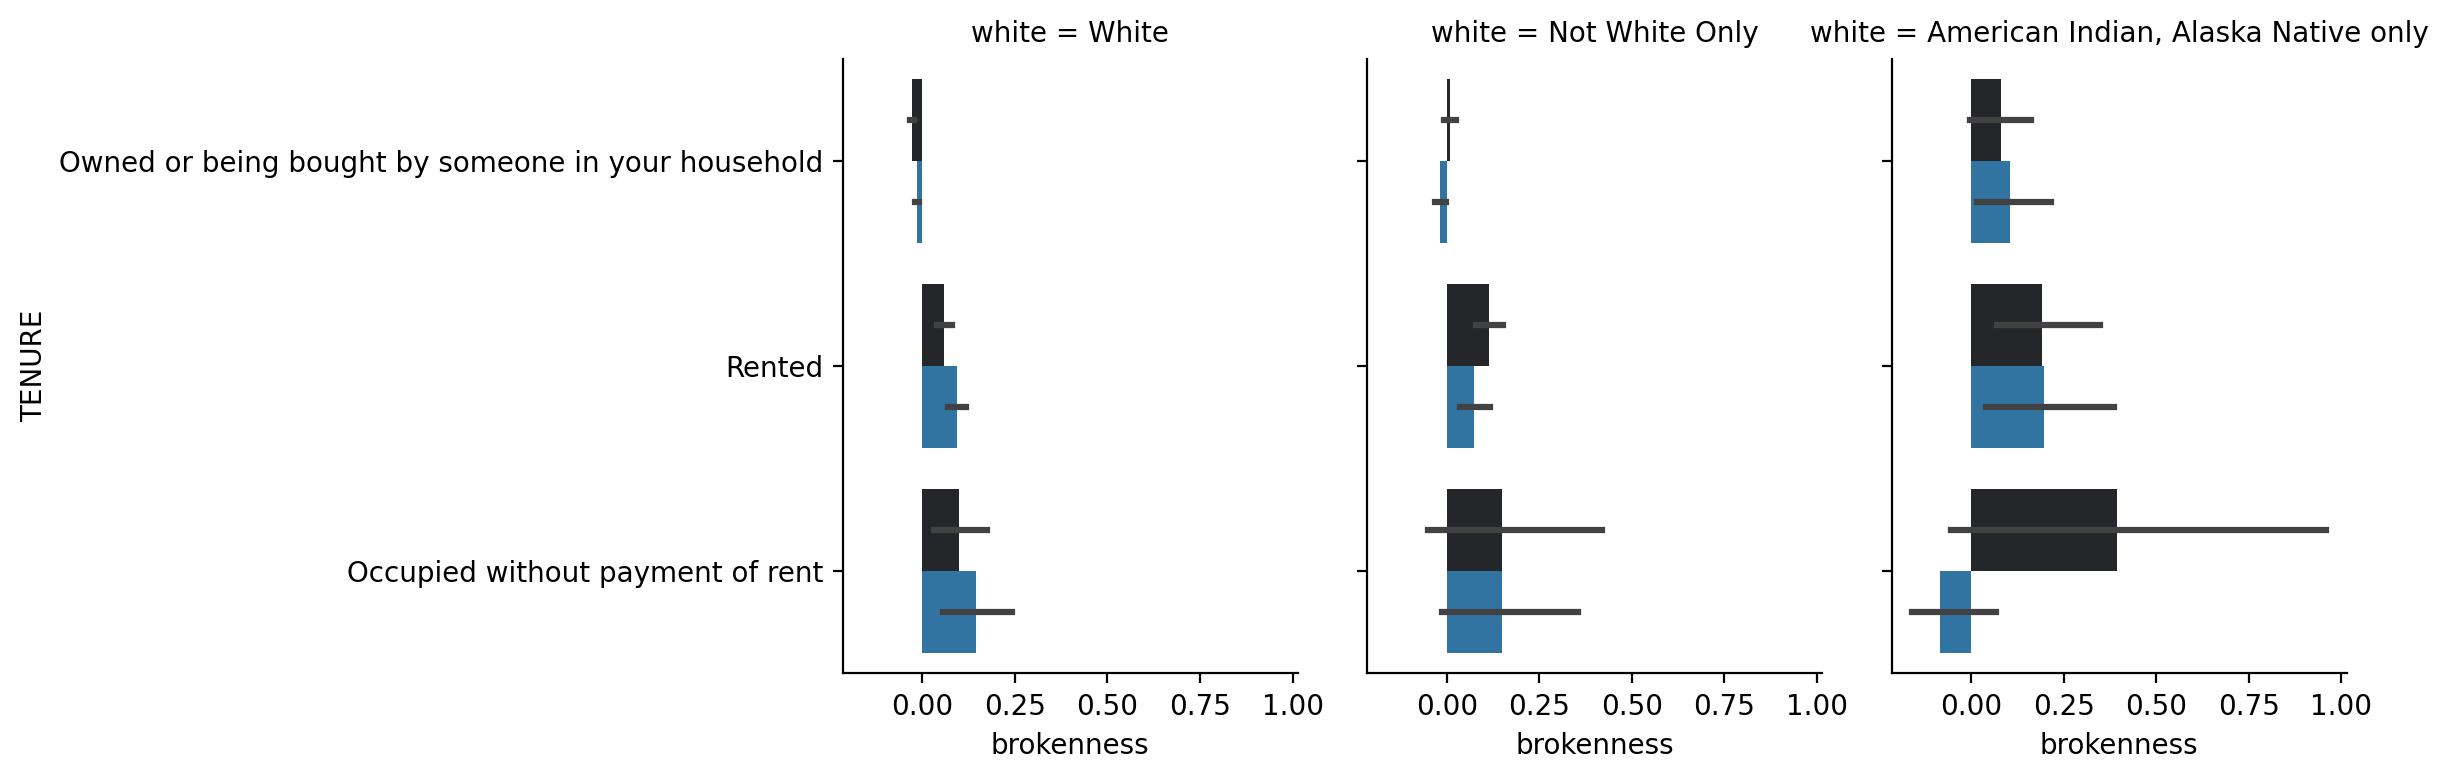

In [116]:
g = sns.FacetGrid(ahs_merge, col='white', col_wrap=3, height=4, aspect=1)
g.map(sns.barplot, 'brokenness', 'TENURE','HHSEX')
g.set_title('{col_name}')